<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DecisionTree_Assignment_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#For data split into train and test
from sklearn.model_selection import train_test_split

#For the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


#for pre processing
from sklearn import preprocessing

##READ CSV in PANDAS and BASIC EDA

In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['Outcome'].value_counts()   #Imbalance dataset

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.isnull().sum()  #clean

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(768, 9)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#TARGET Columns is alrady 0 and 1
#Hence no need of encoding.



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###Divide them into x and y


In [12]:
# x will have all input column and y will have output column


x=df.iloc[:,0:8]
y=df.iloc[:,8:]

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## SPLIT DATA IN TRAIN AND TEST

In [15]:
# x_train  & y_train
# x_test & y_test


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=42)



# NOTE" Sequence of x_train x_test, y_train y_test is fixed.
#test_size 0.2  means test data 10%
# meaning training data 90%

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((691, 8), (77, 8), (691, 1), (77, 1))

####Building Decision Tree Classifier using Entropy as a Criterion

In [17]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5, 0.9, 'x[1] <= 127.5\nentropy = 0.933\nsamples = 691\nvalue = [450, 241]'),
 Text(0.25, 0.7, 'x[7] <= 28.5\nentropy = 0.714\nsamples = 439\nvalue = [353, 86]'),
 Text(0.125, 0.5, 'x[5] <= 30.95\nentropy = 0.404\nsamples = 248\nvalue = [228, 20]'),
 Text(0.0625, 0.3, 'x[0] <= 7.5\nentropy = 0.109\nsamples = 138\nvalue = [136, 2]'),
 Text(0.03125, 0.1, 'entropy = 0.062\nsamples = 137\nvalue = [136, 1]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.3, 'x[2] <= 37.0\nentropy = 0.643\nsamples = 110\nvalue = [92, 18]'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21875, 0.1, 'entropy = 0.605\nsamples = 108\nvalue = [92, 16]'),
 Text(0.375, 0.5, 'x[5] <= 26.35\nentropy = 0.93\nsamples = 191\nvalue = [125, 66]'),
 Text(0.3125, 0.3, 'x[5] <= 9.65\nentropy = 0.31\nsamples = 36\nvalue = [34, 2]'),
 Text(0.28125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.34375, 0.1, 'entropy = 0.0\nsamples = 34\nvalue

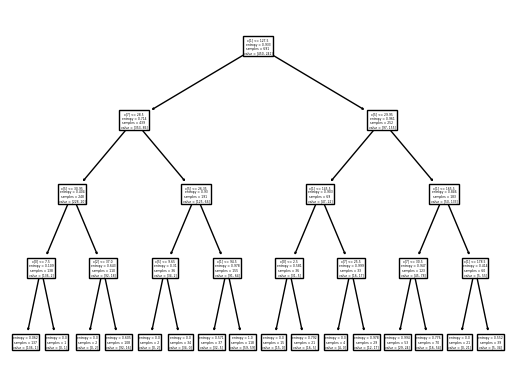

In [18]:
tree.plot_tree(model)

[Text(0.5, 0.9, 'Glucose <= 127.5\nentropy = 0.933\nsamples = 691\nvalue = [450, 241]\nclass = 0'),
 Text(0.25, 0.7, 'age <= 28.5\nentropy = 0.714\nsamples = 439\nvalue = [353, 86]\nclass = 0'),
 Text(0.125, 0.5, 'BMI <= 30.95\nentropy = 0.404\nsamples = 248\nvalue = [228, 20]\nclass = 0'),
 Text(0.0625, 0.3, 'Pregnancies <= 7.5\nentropy = 0.109\nsamples = 138\nvalue = [136, 2]\nclass = 0'),
 Text(0.03125, 0.1, 'entropy = 0.062\nsamples = 137\nvalue = [136, 1]\nclass = 0'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.1875, 0.3, 'BloodPressure <= 37.0\nentropy = 0.643\nsamples = 110\nvalue = [92, 18]\nclass = 0'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.21875, 0.1, 'entropy = 0.605\nsamples = 108\nvalue = [92, 16]\nclass = 0'),
 Text(0.375, 0.5, 'BMI <= 26.35\nentropy = 0.93\nsamples = 191\nvalue = [125, 66]\nclass = 0'),
 Text(0.3125, 0.3, 'BMI <= 9.65\nentropy = 0.31\nsamples = 36\nvalue = [34, 2]\

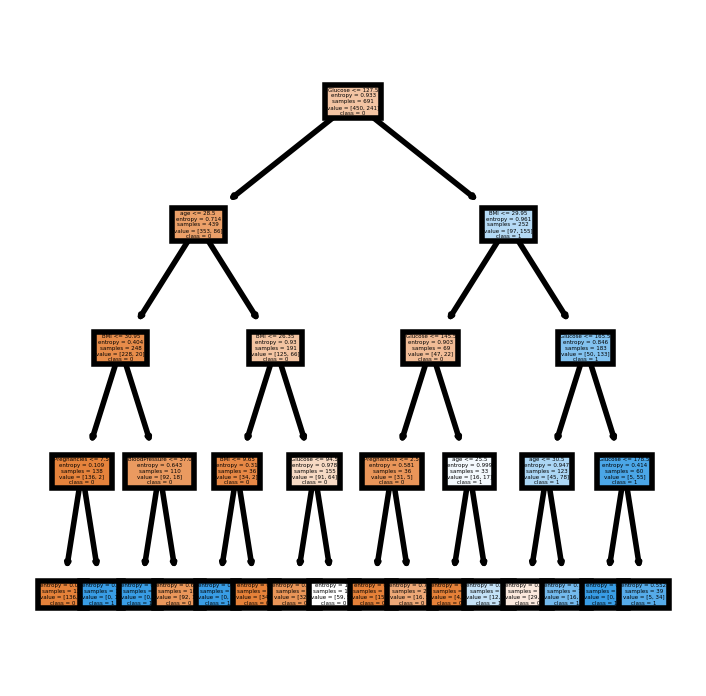

In [19]:
fn = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Na_to_K','BMI','DiabetesPedigreeFunction','age' ]
cn = ['0','1']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)




###Prediction

In [20]:
preds = model.predict(x_test)

In [21]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
512,0
109,1
587,0
362,0


In [22]:
pd.crosstab(y_test['Outcome'],preds)

col_0,0,1
Outcome,,
0,43,7
1,14,13


## ACURACY OF MODEL

In [23]:

np.mean(preds==y_test['Outcome'])

0.7272727272727273

In [24]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [25]:
#Add these y_test column and predicted coluns into x_test
x_test['y_testing']=y_test
x_test['Preds']=preds



In [26]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_testing,Preds
668,6,98,58,33,190,34.0,0.430,43,0,0
324,2,112,75,32,0,35.7,0.148,21,0,0
624,2,108,64,0,0,30.8,0.158,21,0,0
690,8,107,80,0,0,24.6,0.856,34,0,0
473,7,136,90,0,0,29.9,0.210,50,0,0


In [27]:
x_test['y_testing'].value_counts()

0    50
1    27
Name: y_testing, dtype: int64